<a href="https://colab.research.google.com/github/hits-hike/youtube-views-prediction-model/blob/preprocess_w2v/pretest_w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.chdir('/content/gdrive/MyDrive/2021/졸업프로젝트 code')

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from gensim.models import Word2Vec, FastText

In [5]:
data = pd.read_csv('titles_preprocessed.csv', names = ['views', 'title'], usecols = [5, 6])
data.head()

,views,title
0,30038.0,만 19세 연봉 1억 친구와 레스토랑 브이로그
1,29102.0,bbq 신메뉴 체고치 순살 먹어봄
2,25022.0,구찌 라이톤이랑 시계 후기
3,49551.0,엽기 로제떡볶이랑 허니 콤보 혼내줌
4,74348.0,어림도 없지 바로 마라탕 먹어버림


In [6]:
# title
titles = data['title']
titles.head()

0    만 19세 연봉 1억 친구와 레스토랑 브이로그
1           bbq 신메뉴 체고치 순살 먹어봄
2               구찌 라이톤이랑 시계 후기
3          엽기 로제떡볶이랑 허니 콤보 혼내줌
4           어림도 없지 바로 마라탕 먹어버림
Name: title, dtype: object

제목의 최대 길이 : 231
제목의 평균 길이 : 54.892738523585464


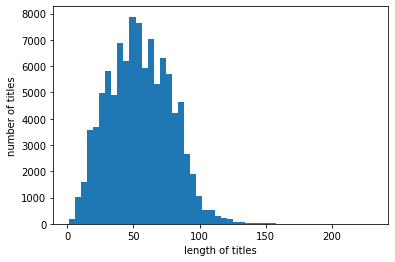

In [7]:
# 제목 길이 분포 
print('제목의 최대 길이 :',max(len(l) for l in titles))
print('제목의 평균 길이 :',sum(map(len, titles))/len(titles))
plt.hist([len(s) for s in titles], bins=50)
plt.xlabel('length of titles')
plt.ylabel('number of titles')
plt.show()

## Word Embedding

In [8]:
def make_corpus(text):
    corpus = []
    for s in titles:
        corpus.append(s.split()) 
    return corpus

In [9]:
# 제목 단어 단위로 나누어주기 
corpus = make_corpus(titles) 

Word2Vec parameters
* size: 임베딩 차원
* window: 윈도우 사이즈
* min_count: 고려할 단어의 최소 빈도 기준
* workers: cpu core 수
* iter: 반복 횟수
* sg == 0: CBOW, sg==1: Skip-Gram

In [10]:
# Skip-Gram 임베딩 모델 
skip_gram = Word2Vec(corpus, size=100, window=3, min_count=5, workers=-1, iter=1000, sg=1) 

In [11]:
# index2word -> 모델의 사전에 있는 단어 명을 담은 리스트
# 중복된 단어들 one hot encoding 알아서 해줌 
words = skip_gram.wv.index2word 

In [12]:
 # 임베딩한 벡터들 
vectors = skip_gram.wv.vectors 

In [13]:
vectors

array([[ 0.00309895, -0.00310418,  0.00361239, ..., -0.00295644,
         0.00062897,  0.00185327],
       [-0.00288717,  0.00454338,  0.00389703, ..., -0.0022659 ,
         0.00255543, -0.00021953],
       [ 0.00406169, -0.00249273, -0.00167179, ...,  0.00134352,
        -0.00021545,  0.00263993],
       ...,
       [ 0.004189  ,  0.00044334,  0.00143272, ..., -0.00082481,
         0.00437782, -0.00358139],
       [-0.00340096,  0.00360344, -0.00257101, ...,  0.00164543,
         0.00053307, -0.00474997],
       [ 0.00205579, -0.00125793,  0.0015345 , ...,  0.00320823,
        -0.00435801,  0.0025362 ]], dtype=float32)

In [14]:
# 토큰과 벡터 묶기
dictionary = dict(zip(words, vectors))

In [15]:
# 코사인 유사도 기반 '브이로그' 토큰과 유사한 토큰 top5 뽑아보기
skip_gram.most_similar('브이로그', topn=20)

[('2번째', 0.4336870312690735),
 ('진', 0.3547367751598358),
 ('좋아하게', 0.3538070023059845),
 ('평소에', 0.3524457812309265),
 ('싫다고', 0.3516256511211395),
 ('얘기하는', 0.34949538111686707),
 ('sex', 0.3494369387626648),
 ('해시태그', 0.3473939895629883),
 ('part', 0.3408406376838684),
 ('담', 0.33794698119163513),
 ('뭐가', 0.3369165062904358),
 ('영어공부', 0.3339134454727173),
 ('분열', 0.3338482975959778),
 ('버젼', 0.3302841782569885),
 ('귀엽게', 0.32427114248275757),
 ('필통소개', 0.32264652848243713),
 ('테이큰', 0.32230424880981445),
 ('macarons', 0.31991297006607056),
 ('강된장', 0.3178783655166626),
 ('일진에게', 0.3151538372039795)]

In [16]:
# 임베딩 벡터 확인하기
import pandas as pd
w2v_df = pd.DataFrame(vectors, columns = list(range(100)))
w2v_df.insert(loc=0, column='word', value=words)
w2v_df

,word,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,!,0.003099,-0.003104,0.003612,-0.002404,-0.003724,-0.000299,-0.003246,-0.000010,-0.001240,0.002204,-0.001042,0.000906,0.004605,-0.000017,0.002628,-0.002757,-0.001042,0.003726,-0.001256,0.002889,-0.002108,0.002653,0.000924,0.000675,0.003546,0.003791,0.001012,-0.004367,0.002199,0.003911,-0.003910,0.003850,-0.003003,0.002627,-0.002987,0.001095,0.003987,-0.002708,0.002631,...,-0.004099,0.004089,0.003867,-0.000015,-0.000772,0.001569,0.000397,0.003981,0.003996,-0.002029,0.003959,0.000698,-0.004938,-0.002697,0.000731,-0.002748,0.000534,0.001843,0.001041,0.000862,-0.003570,-0.002846,-0.003208,-0.002367,-0.000295,0.004012,-0.003025,-0.003623,-0.002911,0.002104,0.004678,-0.002852,0.003219,0.000111,-0.000528,-0.001444,-0.004316,-0.002956,0.000629,0.001853
1,?,-0.002887,0.004543,0.003897,0.002746,0.004043,-0.003468,0.003228,0.001053,-0.002529,0.004308,-0.000544,0.004790,0.001949,-0.003930,0.000178,0.001321,-0.000406,-0.004291,0.001757,-0.000591,-0.001476,0.000744,-0.004251,-0.002280,0.003211,0.001469,0.000510,0.000014,-0.003707,-0.000087,0.001932,0.003483,0.000532,-0.003902,-0.003163,0.003212,0.002587,-0.001153,-0.001208,...,-0.003168,0.002451,-0.003985,0.001089,-0.000560,-0.004253,-0.001827,0.002472,0.003862,-0.003992,-0.000520,0.000021,0.004057,0.004539,0.003891,0.000749,-0.003693,0.003988,0.004048,0.002444,-0.001628,-0.004281,-0.000400,-0.002532,-0.002674,-0.003456,-0.000469,-0.003059,-0.000535,-0.001961,0.003062,-0.004695,0.001350,-0.001888,-0.002544,0.004596,-0.000201,-0.002266,0.002555,-0.000220
2,ep,0.004062,-0.002493,-0.001672,0.004005,0.001829,-0.000167,0.003187,-0.004828,0.001136,-0.000436,-0.000361,0.004759,0.003130,-0.002084,0.000586,-0.004071,0.002442,0.000174,0.004749,0.002097,-0.000064,0.004421,0.003156,0.002202,-0.002657,0.001599,-0.002287,-0.001894,0.000643,0.000881,-0.000241,0.002397,0.002600,-0.002870,0.000807,0.000505,0.004852,0.004894,0.003484,...,0.001330,0.003818,0.000630,0.004991,-0.004445,0.004327,-0.001138,0.003169,-0.004135,-0.001906,0.000341,-0.004915,-0.003648,0.001312,-0.004695,-0.002823,-0.000627,0.002355,-0.002203,-0.004910,0.000191,-0.000344,-0.002478,0.000217,0.001827,0.002706,-0.002764,-0.004191,0.003474,0.001616,-0.002735,0.002844,0.004910,-0.001892,0.002620,-0.003734,-0.002064,0.001344,-0.000215,0.002640
3,브이로그,-0.001010,-0.002753,0.003109,-0.004799,0.002257,0.003610,0.003494,-0.004748,-0.001167,-0.001348,0.003963,-0.000568,-0.002104,0.002474,0.003317,-0.002246,-0.004555,0.003790,0.003109,-0.001512,-0.003694,0.004535,0.003145,0.000263,0.003091,-0.001430,-0.003437,0.002340,-0.003360,-0.001663,0.000412,0.001792,0.004257,0.003770,0.000406,0.001577,-0.001100,-0.003231,-0.000503,...,-0.001917,0.004912,0.000981,0.004256,0.004569,-0.000799,-0.003739,-0.003725,-0.003445,0.002840,0.001524,-0.003815,-0.002653,-0.000623,-0.003694,0.002463,0.001513,0.001988,-0.000869,0.000100,-0.000627,-0.004357,-0.000358,-0.002486,-0.003645,-0.000954,-0.000085,0.004940,-0.001298,0.001385,0.001381,0.001977,0.003287,0.004942,-0.003906,-0.001530,-0.003364,-0.004400,-0.004835,-0.003227
4,vlog,-0.001995,-0.000576,-0.004733,-0.001138,0.003567,-0.003353,-0.000039,-0.000037,-0.000856,0.004887,-0.003325,0.002701,-0.000431,0.003432,-0.004382,0.004799,0.000361,-0.000354,0.004935,-0.003834,-0.004702,-0.002193,-0.001345,0.004472,0.003230,0.002298,-0.002682,-0.001735,-0.001198,0.000602,0.001137,0.004100,-0.000690,0.002140,0.004972,0.001422,0.003103,-0.000371,-0.000790,...,0.001756,0.004766,-0.001233,0.004423,-0.000857,0.004415,0.001498,-0.002686,0.003115,0.003219,0.000358,-0.002901,0.004715,-0.002903,-0.002886,0.000415,-0.000736,0.003233,0.003122,-0.003017,0.000149,-0.003075,-0.003429,-0.004327,-0.004116,-0.004964,-0.001453,0.004801,0.002855,-0.004173,0.001553,-0.002132,0.001341,0.000398,-0.004855,0.001945,-0

In [17]:
# 모델 저장하기
from gensim.models import KeyedVectors
skip_gram.wv.save_word2vec_format('pretest_w2v') 